In [1]:
import numpy as np, pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import statsmodels.api as sm
from tqdm import tqdm_notebook
from scipy.special import logit
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

cols = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]

# unique

In [4]:
data = pd.concat([train, test], axis=0, sort=False)
df = pd.DataFrame(cols, columns=['feature'])
df['n_train_unique'] = train[cols].nunique(axis=0).values
df['n_test_unique'] = test[cols].nunique(axis=0).values

for i in df.index:
    col = df.loc[i, 'feature']
    df.loc[i, 'n_overlap'] = int(np.isin(train[col].unique(), test[col]).sum())

df['value_range'] = data[cols].max(axis=0).values - data[cols].min(axis=0).values

df.T

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
feature,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,...,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert
n_train_unique,254322,254588,254356,254576,254330,254270,254324,254224,254752,254205,...,254465,254718,254630,254381,254383,254261,254366,254345,254329,254192
n_test_unique,129044,129165,129104,129228,129060,129095,129075,129118,129198,129122,...,129056,129201,129179,129094,129186,129136,129084,129117,129050,129121
n_overlap,7518,7478,7528,7021,7708,7466,7607,7692,7060,7742,...,7437,7309,7278,7453,7548,7807,7612,7578,7443,7646
value_range,31.3854,34.2213,32.8501,32.2581,33.6164,32.4482,31.8324,32.3419,36.408,32.3243,...,35.6404,34.7955,38.7147,32.3608,32.0256,31.7126,34.6808,35.2335,35.8432,34.1456


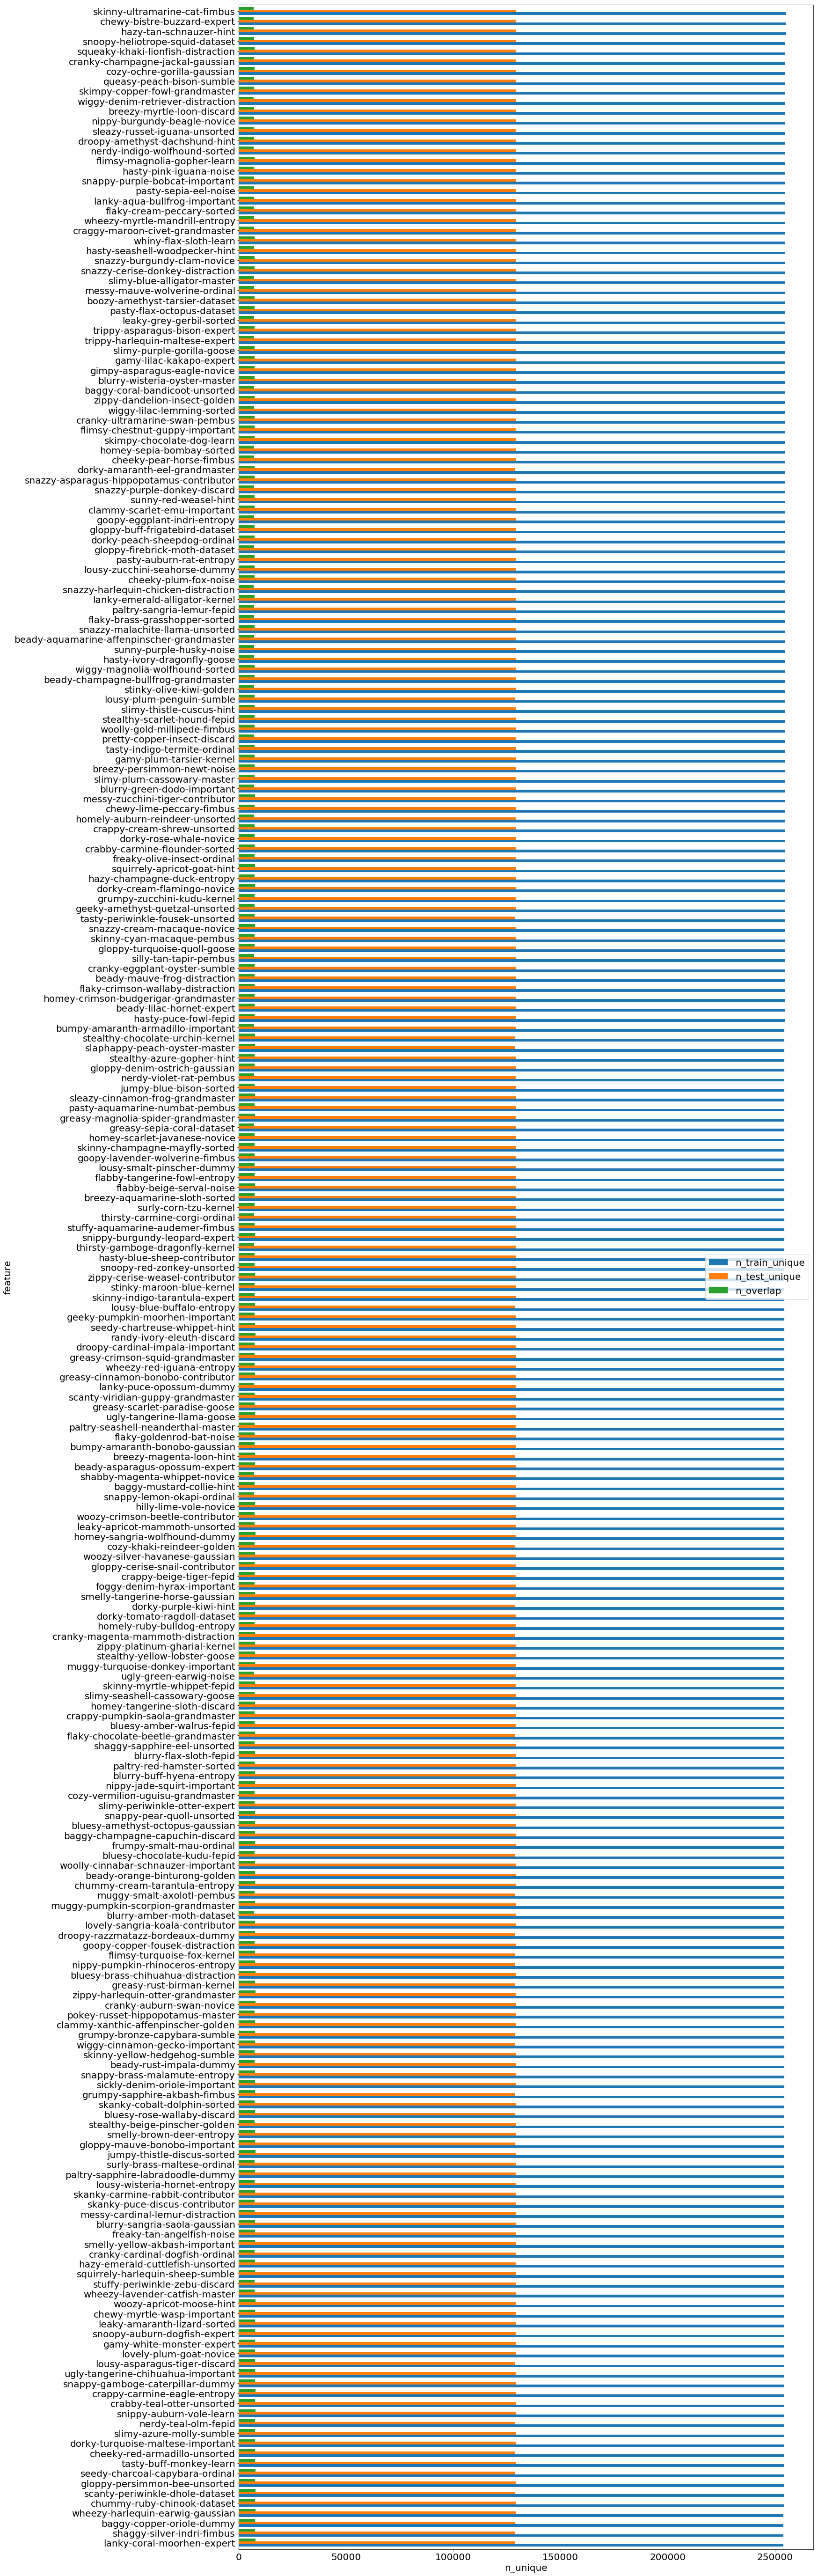

In [5]:
# unique plot (모두가 unique한값을 가짐)
df = df.sort_values(by='n_train_unique').reset_index(drop=True)
df[['n_train_unique', 'n_test_unique', 'n_overlap']].plot(kind='barh' ,figsize=(22, 100), fontsize=20, width=0.8)
plt.yticks(df.index, df['feature'].values)
plt.xlabel('n_unique', fontsize=20)
plt.ylabel('feature', fontsize=20)
plt.legend(loc='center right', fontsize=20)

# 반올림 후 unique

In [6]:
train = np.round(train,3)
test = np.round(test,3)

In [7]:
data = pd.concat([train, test], axis=0, sort=False)
df = pd.DataFrame(cols, columns=['feature'])
df['n_train_unique'] = train[cols].nunique(axis=0).values
df['n_test_unique'] = test[cols].nunique(axis=0).values

for i in df.index:
    col = df.loc[i, 'feature']
    df.loc[i, 'n_overlap'] = int(np.isin(train[col].unique(), test[col]).sum())

df['value_range'] = data[cols].max(axis=0).values - data[cols].min(axis=0).values

df.T

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
feature,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,...,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert
n_train_unique,14292,14367,14189,15403,14428,14424,14328,14189,15368,13836,...,14494,14928,14844,14753,14229,14154,14588,14215,14595,13964
n_test_unique,11457,11499,11590,12559,11619,11665,11513,11402,12572,11189,...,11665,12134,12037,11956,11434,11428,11748,11367,11812,11178
n_overlap,9901,9960,9927,11047,10030,10075,9921,9743,10963,9620,...,10079,10529,10436,10413,9832,9801,10110,9799,10220,9602
value_range,31.385,34.221,32.85,32.258,33.617,32.448,31.832,32.341,36.408,32.324,...,35.641,34.796,38.715,32.361,32.025,31.713,34.681,35.233,35.843,34.146


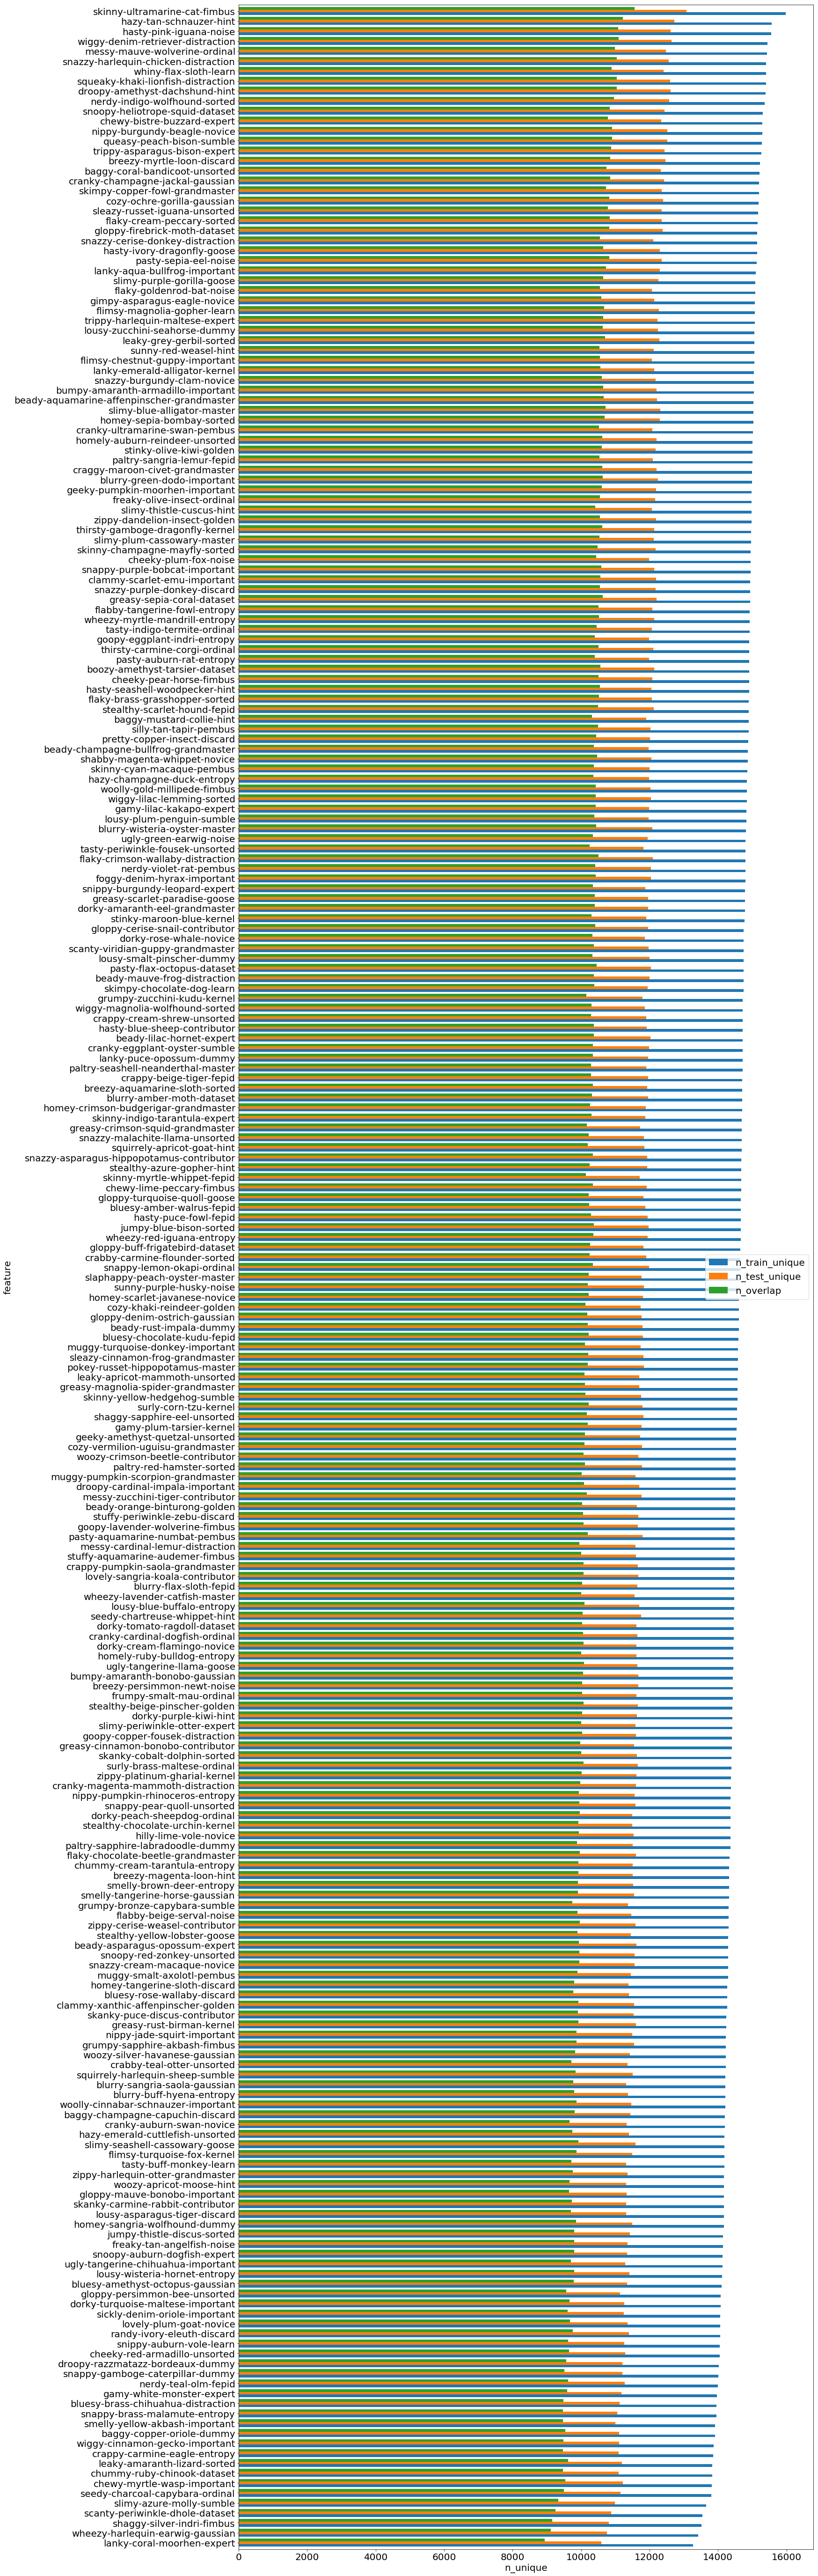

In [8]:
# === plot
df = df.sort_values(by='n_train_unique').reset_index(drop=True)
df[['n_train_unique', 'n_test_unique', 'n_overlap']].plot(kind='barh' ,figsize=(22, 100), fontsize=20, width=0.8)
plt.yticks(df.index, df['feature'].values)
plt.xlabel('n_unique', fontsize=20)
plt.ylabel('feature', fontsize=20)
plt.legend(loc='center right', fontsize=20)